# XGBoost Model 

In [2]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# load data with pandas
df = pd.read_csv('Train.csv')

# Convert categorical columns to dummy variables
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

# Extract features and target variable
X = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier'])  # Assuming 'Item_Identifier' is not a useful feature
y = df['Item_Outlet_Sales']

# split data into train and test sets
seed = 7
test_size = 0.33
# Assuming 'Item_Identifier' is not a useful feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialize XGBoost regressor for regression
model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
model.fit(X_train, y_train_encoded)

# Ensure that the test set has the same columns as the training set
X_test = X_test[X_train.columns]

# Make predictions on the test set
y_pred_encoded = model.predict(X_test)

# Decode the predictions if needed
# Skip decoding if the target variable is already numeric
# y_pred_decoded = label_encoder.inverse_transform(y_pred_encoded.astype(int))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_encoded)
print(f'Mean Squared Error: {mse:.2f}')

# Optionally, you can print or plot feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f'{feature}: {importance:.4f}')


Mean Squared Error: 2541910.62
Feature Importances:
Item_Weight: 0.0063
Item_Visibility: 0.0034
Item_MRP: 0.0252
Outlet_Establishment_Year: 0.0039
Item_Fat_Content_Low Fat: 0.0040
Item_Fat_Content_Regular: 0.0000
Item_Type_Baking Goods: 0.0032
Item_Type_Breads: 0.0011
Item_Type_Breakfast: 0.0036
Item_Type_Canned: 0.0026
Item_Type_Dairy: 0.0032
Item_Type_Frozen Foods: 0.0034
Item_Type_Fruits and Vegetables: 0.0030
Item_Type_Hard Drinks: 0.0038
Item_Type_Health and Hygiene: 0.0030
Item_Type_Household: 0.0037
Item_Type_Meat: 0.0028
Item_Type_Others: 0.0019
Item_Type_Seafood: 0.0028
Item_Type_Snack Foods: 0.0030
Item_Type_Soft Drinks: 0.0043
Item_Type_Starchy Foods: 0.0030
Outlet_Identifier_OUT010: 0.0018
Outlet_Identifier_OUT013: 0.0039
Outlet_Identifier_OUT017: 0.0041
Outlet_Identifier_OUT018: 0.0000
Outlet_Identifier_OUT019: 0.0005
Outlet_Identifier_OUT027: 0.0024
Outlet_Identifier_OUT035: 0.0027
Outlet_Identifier_OUT045: 0.0035
Outlet_Identifier_OUT046: 0.0035
Outlet_Identifier_OUT049:

Mean Squared Error (MSE):

The MSE value you provided is 2541910.62. This metric represents the average squared difference between the actual and predicted values. In the context of your regression model, a lower MSE is generally better, indicating that the model's predictions are closer to the actual values. However, the interpretation of MSE depends on the scale of your target variable (sales in this case).
Feature Importances:

Feature importances represent the contribution of each feature to the predictive performance of the model. In your case, these features are related to different aspects of items and outlets. Here are some key points:
Item_MRP (Item Maximum Retail Price): This feature has the highest importance (0.0252), suggesting that it significantly influences the sales predictions. Items with higher MRP may have a greater impact on sales.
Outlet_Type_Grocery Store: This feature has a very high importance (0.8631), indicating that the type of outlet, specifically "Grocery Store," is a crucial factor in predicting sales. It overshadows the importance of many other features.
Other Features: Various item-related and outlet-related features contribute to the model, though some have lower importance values.
Zero Importance Features:

Some features have importance values of 0.0000, indicating that they did not contribute significantly to the model's predictions. For example, "Item_Fat_Content_Regular," "Outlet_Identifier_OUT018," "Outlet_Size_High," "Outlet_Type_Supermarket Type2," and "Outlet_Type_Supermarket Type3."

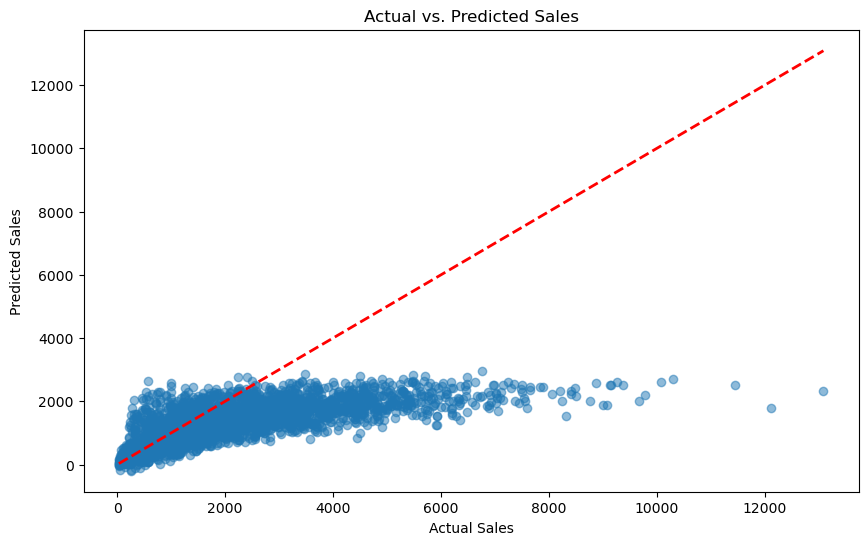

In [7]:

# Visualize predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_encoded, alpha=0.5)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

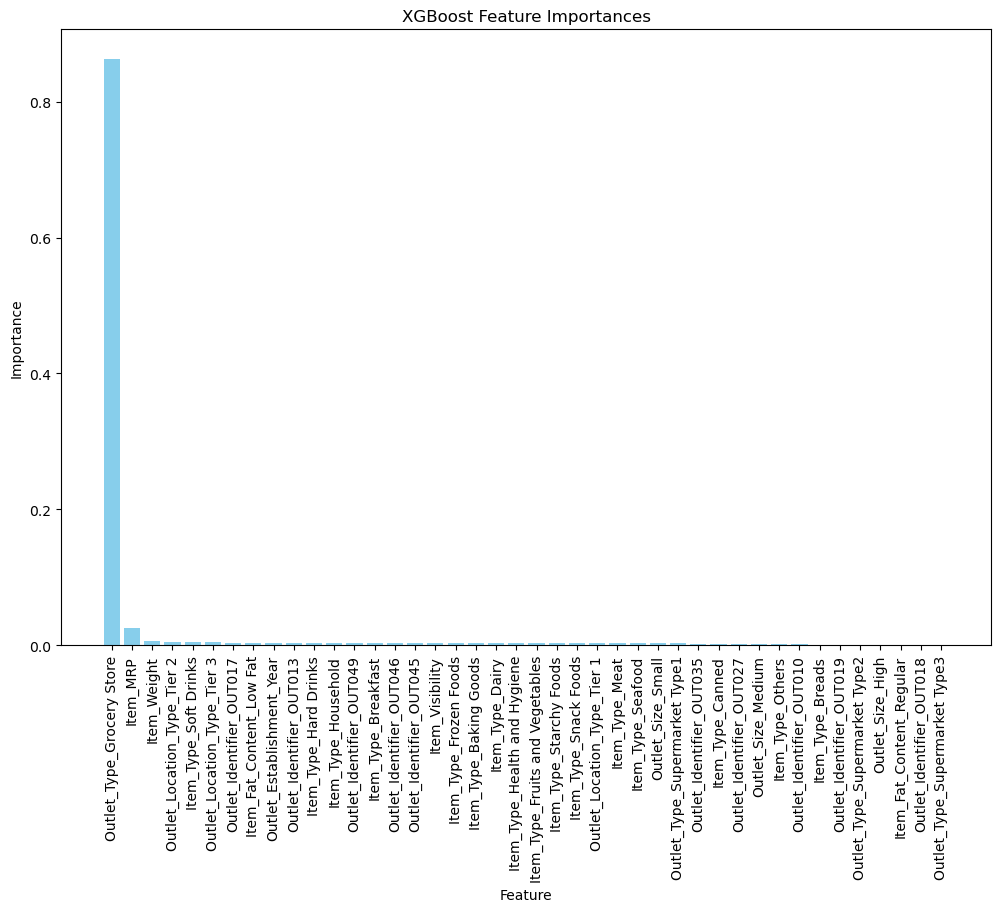

In [8]:
import matplotlib.pyplot as plt

# Extract feature names and importances
feature_names = X.columns
importances = model.feature_importances_

# Create a DataFrame for better sorting and plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importances')
plt.xticks(rotation=90)
plt.show()